In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

from evaluation.help_functions.prepare_data import most_recent_thursday
from dax.help_functions.calculate_returns import calculate_returns


def get_data():

    msft = yf.Ticker("^GDAXI")
    daxdata = msft.history(period="max")

    return (daxdata)


def get_prepared_data(daxdata=pd.DataFrame):

    if daxdata.empty:
        daxdata = get_data()

    daxdata = calculate_returns(daxdata, lags=5)
    start_date_excl = most_recent_thursday(daxdata) - timedelta(days=1)
    daxdata = daxdata.loc[(daxdata.index >= daxdata.index[8000])
                          & (daxdata.index < start_date_excl)]
    daxdata = daxdata[[
        'Close', 'LogRetLag1', 'LogRetLag2', 'LogRetLag3', 'LogRetLag4', 'LogRetLag5']]
    daxdata = daxdata.dropna()

    return (daxdata)

In [2]:
from dax.help_functions.calculate_returns import calculate_returns
# S&P 500
sp500 = yf.Ticker('^GSPC')
usdata = sp500.history(period="max")

# Shenzen Index
shenzhen = yf.Ticker('399001.SZ')
chinadata = shenzhen.history(period='max')

In [3]:
usdata = calculate_returns(usdata, lags=1)
usdata['date'] = usdata.index.date
usdata['close_sp500'] = usdata['Close']
usdata = usdata[['date', 'close_sp500', 'LogRetLag1']]
usdata = usdata.rename(columns={'LogRetLag1': 'LogRet1_sp500'})
usdata

,date,close_sp500,LogRet1_sp500
Date,,,
1928-01-03 00:00:00-05:00,1928-01-03,17.760000,0.564656
1928-01-04 00:00:00-05:00,1928-01-04,17.719999,-0.225484
1928-01-05 00:00:00-05:00,1928-01-05,17.549999,-0.964000
1928-01-06 00:00:00-05:00,1928-01-06,17.660000,0.624828
1928-01-09 00:00:00-05:00,1928-01-09,17.500000,-0.910131
...,...,...,...
2024-01-22 00:00:00-05:00,2024-01-22,4850.430176,0.219192
2024-01-23 00:00:00-05:00,2024-01-23,4864.600098,0.291712
2024-01-24 00:00:00-05:00,2024-01-24,4868.549805,0.081160


In [4]:
chinadata = calculate_returns(chinadata, lags=1)
chinadata['date'] = chinadata.index.date
chinadata['close_shenzhen'] = chinadata['Close']
chinadata = chinadata[['date', 'close_shenzhen', 'LogRetLag1']]
chinadata = chinadata.rename(columns={'LogRetLag1': 'LogRet1_shenzhen'})
chinadata

,date,close_shenzhen,LogRet1_shenzhen
Date,,,
1997-08-25 00:00:00+08:00,1997-08-25,4362.980957,2.811768
1997-08-26 00:00:00+08:00,1997-08-26,4386.471191,0.536955
1997-08-27 00:00:00+08:00,1997-08-27,4408.340332,0.497320
1997-08-28 00:00:00+08:00,1997-08-28,4438.270020,0.676639
1997-08-29 00:00:00+08:00,1997-08-29,4398.680664,-0.896002
...,...,...,...
2024-01-22 00:00:00+08:00,2024-01-22,8479.549805,-3.561822
2024-01-23 00:00:00+08:00,2024-01-23,8596.280273,1.367222
2024-01-24 00:00:00+08:00,2024-01-24,8682.190430,0.994427


In [5]:
daxdata = get_prepared_data()[-1100:]
daxdata['date'] = daxdata.index.date
daxdata['close_dax'] = daxdata['Close']
daxdata = daxdata.drop(
    columns=['Close','LogRetLag2', 'LogRetLag3', 'LogRetLag3', 'LogRetLag4', 'LogRetLag5'])
daxdata = daxdata.rename(columns={'LogRetLag1': 'LogRet1_dax'})
daxdata

,LogRet1_dax,date,close_dax
Date,,,
2019-09-30 00:00:00+02:00,0.380021,2019-09-30,12428.080078
2019-10-01 00:00:00+02:00,-1.330415,2019-10-01,12263.830078
2019-10-02 00:00:00+02:00,-2.799629,2019-10-02,11925.250000
2019-10-04 00:00:00+02:00,0.731554,2019-10-04,12012.809570
2019-10-07 00:00:00+02:00,0.701946,2019-10-07,12097.429688
...,...,...,...
2024-01-18 00:00:00+01:00,0.822211,2024-01-18,16567.349609
2024-01-19 00:00:00+01:00,-0.073779,2024-01-19,16555.130859
2024-01-22 00:00:00+01:00,0.771570,2024-01-22,16683.359375


In [6]:
merged_df = pd.merge(usdata, chinadata, on='date', how='inner')
final_merged_df = pd.merge(merged_df, daxdata, on='date', how='inner')
final_merged_df

,date,close_sp500,LogRet1_sp500,close_shenzhen,LogRet1_shenzhen,LogRet1_dax,close_dax
0,2019-09-30,2976.739990,0.503491,9446.240234,-1.081544,0.380021,12428.080078
1,2019-10-08,2893.060059,-1.568316,9474.750000,0.301356,-1.057276,11970.200195
2,2019-10-09,2919.399902,0.906330,9506.559570,0.335168,1.031070,12094.259766
3,2019-10-10,2938.129883,0.639520,9638.099609,1.374191,0.576629,12164.200195
4,2019-10-11,2970.270020,1.087958,9666.580078,0.295063,2.816301,12511.650391
...,...,...,...,...,...,...,...
996,2024-01-18,4780.939941,0.876672,8847.000000,0.990994,0.822211,16567.349609
997,2024-01-19,4839.810059,1.223831,8787.019531,-0.680284,-0.073779,16555.130859
998,2024-01-22,4850.430176,0.219192,8479.549805,-3.561822,0.771570,16683.359375
999,2024-01-23,4864.600098,0.291712,8596.280273,1.367222,-0.337849,16627.089844


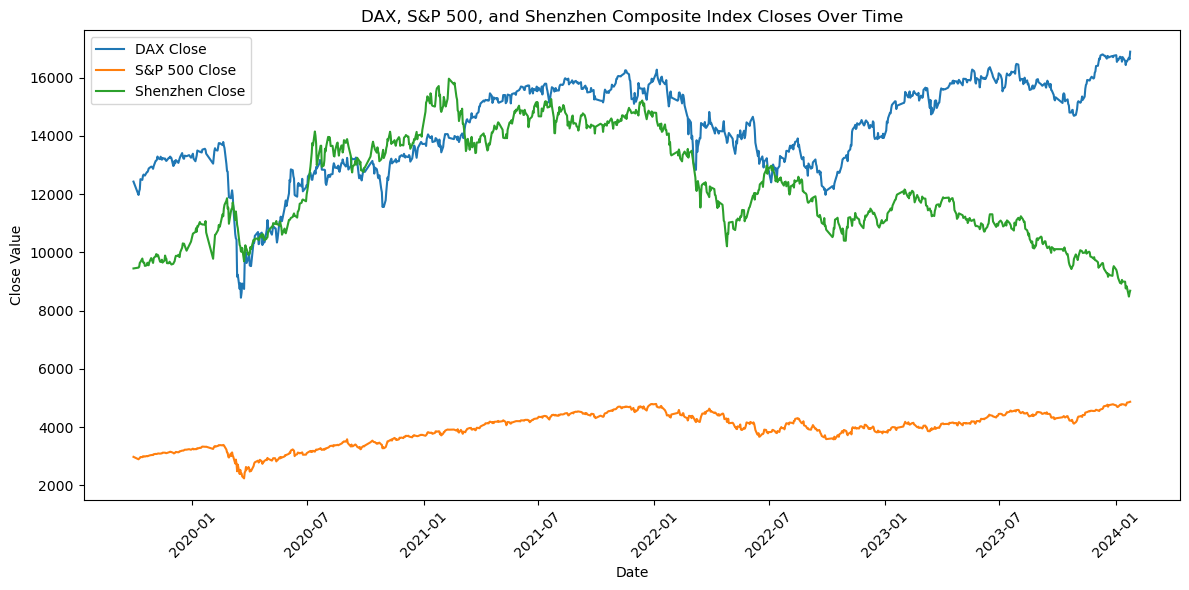

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 6))

# Plotting the 'close_dax' column
plt.plot(final_merged_df['date'], final_merged_df['close_dax'],
         label='DAX Close')

# Plotting the 'close_sp500' column
plt.plot(final_merged_df['date'], final_merged_df['close_sp500'],
         label='S&P 500 Close')

# Plotting the 'close_shenzhen' column
plt.plot(final_merged_df['date'], final_merged_df['close_shenzhen'],
         label='Shenzhen Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.title('DAX, S&P 500, and Shenzhen Composite Index Closes Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Specifically look at time during COVID

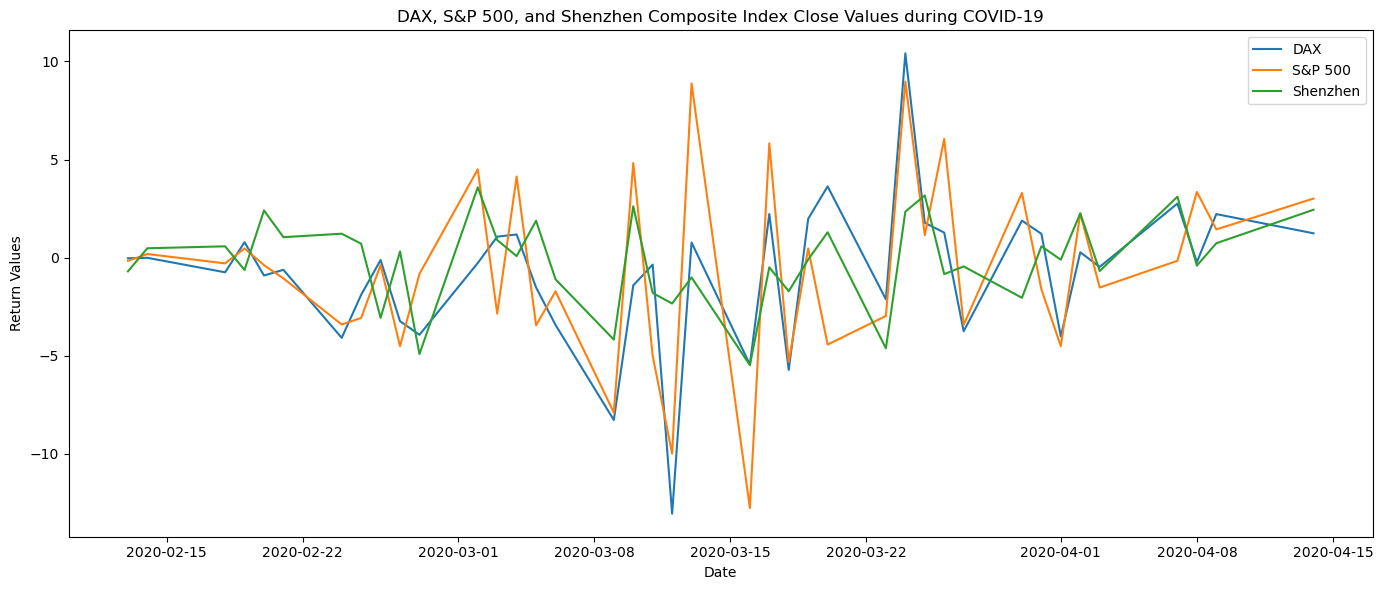

In [15]:
# Filter data for January 2020 to June 2020
filtered_df = final_merged_df[80:120]

plt.figure(figsize=(14, 6))

# Plotting the 'close_dax' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_dax'],
         label='DAX')

# Plotting the 'close_sp500' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_sp500'],
         label='S&P 500')

# Plotting the 'close_shenzhen' column
plt.plot(filtered_df['date'], filtered_df['LogRet1_shenzhen'],
         label='Shenzhen')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Return Values')
plt.title('DAX, S&P 500, and Shenzhen Composite Index Close Values during COVID-19')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
# plt.xticks(rotation=30)

# Display the plot
plt.tight_layout()
plt.show()

Analyse zeigt: Sind alle gleichzeitig eingebrochen --> nicht relevant 
--> Weitere Merkmale suchen

Allerdings: Gleiche Volatilität, S&P500 Volatility vorhanden --> nutzen

In [20]:
def get_us_volatility_data():

    msft = yf.Ticker("^VIX")
    vol_data = msft.history(period="max")

    return vol_data

us_vol_data = get_us_volatility_data()[['Close']].rename(columns={'Close': 'us_volatility'})
us_vol_data['date'] = us_vol_data.index.date

us_vol_data['weekly_mean_vol'] = us_vol_data['us_volatility'].rolling(
    window=5).mean()

if 'date' not in daxdata.columns: 
    daxdata['date'] = daxdata.index.date

merged = pd.merge(daxdata, us_vol_data, how='left', on = 'date').set_index('date')

# store weekly means and close-to-close-volatility for every week starting by wednesday
volatilityvalue = np.nan
merged['weekday'] = daxdata.index.weekday

for index, row in merged.iterrows():
    if row['weekday'] == 2:
        volatilityvalue = row['weekly_mean_vol']
    merged.loc[index, 'volatility_weekly'] = volatilityvalue

merged = merged[7:].drop(columns=['us_volatility','weekly_mean_vol', 'weekday'])
merged

,LogRet1_dax,close_dax,volatility_weekly
date,,,
2019-10-10,0.576629,12164.200195,18.876
2019-10-11,2.816301,12511.650391,18.876
2019-10-14,-0.200741,12486.559570,18.876
2019-10-15,1.140548,12629.790039,18.876
2019-10-16,0.318739,12670.110352,14.988
...,...,...,...
2024-01-18,0.822211,16567.349609,NaN
2024-01-19,-0.073779,16555.130859,NaN
2024-01-22,0.771570,16683.359375,NaN


In [46]:
daxdata = get_prepared_data()
def get_us_volatility_data():

    msft = yf.Ticker("^VIX")
    vol_data = msft.history(period="max")

    return vol_data

us_vol_data = get_us_volatility_data()[['Close']].rename(
    columns={'Close': 'us_volatility'})
us_vol_data['date'] = us_vol_data.index.date

us_vol_data['US_vol'] = us_vol_data['us_volatility'].rolling(
    window=5).mean()

if 'date' not in daxdata.columns:
    daxdata['date'] = daxdata.index.date

merged = pd.merge(daxdata, us_vol_data, how='left',
                  on='date').set_index('date')

merged = merged[7:].drop(
    columns=['us_volatility'])
merged


,Close,LogRetLag1,LogRetLag2,LogRetLag3,LogRetLag4,LogRetLag5,US_vol
date,,,,,,,
2019-09-19,12457.700195,0.547989,0.685373,0.623165,-0.086897,0.381618,14.170
2019-09-20,12468.009766,0.082722,0.630711,0.768096,0.705887,-0.004175,14.486
2019-09-23,12342.330078,-1.013132,-0.930410,-0.382421,-0.245036,-0.307245,14.534
2019-09-24,12307.150391,-0.285440,-1.298572,-1.215850,-0.667861,-0.530476,15.056
2019-09-25,12234.179688,-0.594678,-0.880118,-1.893250,-1.810527,-1.262539,15.458
...,...,...,...,...,...,...,...
2024-01-18,16567.349609,0.822211,-0.026133,-0.330653,-0.824790,0.122728,13.580
2024-01-19,16555.130859,-0.073779,0.748432,-0.099912,-0.404432,-0.898569,13.752
2024-01-22,16683.359375,0.771570,0.697791,1.520002,0.671658,0.367138,13.850


In [37]:
np.mean([-0.0066, -0.0302, -0.0644, -0.1093, -0.1544])

-0.07298

In [50]:
daxdata = get_prepared_data()

# calculate absolute returns
daxdata['Intraday_Volatility'] = daxdata['LogRetLag1'].apply(lambda x: x**2)
daxdata['Intraweek_Volatility'] = daxdata['Intraday_Volatility'].rolling(
        window=5).mean()

weeklyvolatilityvalue = np.nan
daxdata['weekday'] = daxdata.index.weekday
for index, row in daxdata.iterrows():
    if row['weekday'] == 2:
        weeklyvolatilityvalue= row['Intraweek_Volatility']
    daxdata.loc[index, 'intraweek_vol'] = weeklyvolatilityvalue

daxdata = daxdata[-5:].drop(columns=['Intraday_Volatility','Intraweek_Volatility', 'weekday'])
daxdata

,Close,LogRetLag1,LogRetLag2,LogRetLag3,LogRetLag4,LogRetLag5,intraweek_vol
Date,,,,,,,
2024-01-18 00:00:00+01:00,16567.349609,0.822211,-0.026133,-0.330653,-0.824790,0.122728,0.538515
2024-01-19 00:00:00+01:00,16555.130859,-0.073779,0.748432,-0.099912,-0.404432,-0.898569,0.538515
2024-01-22 00:00:00+01:00,16683.359375,0.771570,0.697791,1.520002,0.671658,0.367138,0.538515
2024-01-23 00:00:00+01:00,16627.089844,-0.337849,0.433721,0.359942,1.182153,0.333809,0.538515
2024-01-24 00:00:00+01:00,16889.919922,1.568371,1.230521,2.002091,1.928312,2.750524,0.770145


In [43]:
daxdata.corr() # everything similar, high explainability --> use them!

,Close,LogRetLag1,LogRetLag2,LogRetLag3,LogRetLag4,LogRetLag5,intraday_vol,weekly_std,intraweek_vol
Close,1.000000,0.742447,0.778006,0.915403,0.857902,0.959897,0.926376,0.926376,0.926376
LogRetLag1,0.742447,1.000000,0.389610,0.648385,0.315592,0.774919,0.744606,0.744606,0.744606
LogRetLag2,0.778006,0.389610,1.000000,0.788614,0.720193,0.590695,0.745297,0.745297,0.745297
LogRetLag3,0.915403,0.648385,0.788614,1.000000,0.834458,0.799100,0.716915,0.716915,0.716915
LogRetLag4,0.857902,0.315592,0.720193,0.834458,1.000000,0.798202,0.701375,0.701375,0.701375
LogRetLag5,0.959897,0.774919,0.590695,0.799100,0.798202,1.000000,0.922936,0.922936,0.922936
intraday_vol,0.926376,0.744606,0.745297,0.716915,0.701375,0.922936,1.000000,1.000000,1.000000
weekly_std,0.926376,0.744606,0.745297,0.716915,0.701375,0.922936,1.000000,1.000000,1.000000
intraweek_vol,0.926376,0.744606,0.745297,0.716915,0.701375,0.922936,1.000000,1.000000,1.000000


In [35]:
np.mean([0.74461, 0.7453, 0.7169, 0.7014, 0.9229])

0.766222

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


def merge_unemployment_rate(daxdata):

    print('update unemployment rate on: https://statistik.arbeitsagentur.de/DE/Navigation/Statistiken/Interaktive-Statistiken/Zeitreihen/Lange-Zeitreihen-Nav.html')
    unemployment_rate = pd.read_csv(
        'C:/Users/Maria/Documents/Studium/Pyhton Projekte/PTSFC/dax/help_functions/unemployment/unemployment_rate.csv')
    unemployment_rate['rate'] = unemployment_rate['rate'].str.replace(
        ',', '.').astype(float)

    # predict missing montly rate based on AR(3) model
    unemployment_rate['Lag1'] = unemployment_rate['rate'].shift(1)
    unemployment_rate['Lag2'] = unemployment_rate['rate'].shift(2)
    unemployment_rate['Lag3'] = unemployment_rate['rate'].shift(3)

    # train model with all values not containing nans
    bool_series = unemployment_rate['rate'].isna()
    first_index = bool_series.idxmax()
    unemployment_rate_model = unemployment_rate[3:first_index]

    # get data
    X_lags_ext = sm.add_constant(
        unemployment_rate_model.loc[:, 'Lag1':'Lag3'])
    y_index_ext = np.array(unemployment_rate_model.loc[:, 'rate'])

    # AR model (using OLS)
    model = sm.OLS(y_index_ext, X_lags_ext).fit()

    # Get the beta coefficients
    betas = np.array(model.params)

    # predict future prod indexes
    X_array = np.array([1, unemployment_rate.at[first_index, 'Lag1'], unemployment_rate.at[first_index, 'Lag2'],
                        unemployment_rate.at[first_index, 'Lag3']])
    lag1, lag2 = np.nan, np.nan

    for idx, row in unemployment_rate[first_index:].iterrows():
        # predict and safe
        index_pred = betas.dot(X_array)
        unemployment_rate.at[idx, 'rate'] = index_pred

        # update data for next iteration
        lag1, lag2 = X_array[1], X_array[2]
        X_array[2], X_array[3] = lag1, lag2  # shift backwards
        X_array[1] = index_pred

    daxdata['year'] = daxdata.index.year
    daxdata['month'] = daxdata.index.month
    daxdata = daxdata.reset_index()

    merged = pd.merge(daxdata, unemployment_rate, how='left', left_on=['year', 'month'], right_on=[
                      'year', 'month']).set_index('Date').drop(columns={'year', 'month', 'Lag1', 'Lag2',
                                                                             'Lag3'})

    return merged, model.rsquared_adj

Korrelation auch sehr marginal --> einfach weglassen: Test durch Quantile Regression und schauen ob Score besser

In [88]:
def get_intraweek_vol(daxdf):

    daxdata = daxdf.copy()
    # calculate absolute returns
    daxdata['Intraday_Volatility'] = daxdata['LogRetLag1'].apply(lambda x: x**2)
    daxdata['Intraweek_Volatility'] = daxdata['Intraday_Volatility'].rolling(
        window=5).mean()

    weeklyvolatilityvalue = np.nan
    daxdata['weekday'] = daxdata.index.weekday
    for index, row in daxdata.iterrows():
        if row['weekday'] == 2:
            weeklyvolatilityvalue = row['Intraweek_Volatility']
        daxdata.loc[index, 'intraweek_vol'] = weeklyvolatilityvalue

    daxdata = daxdata[6:].drop(columns=['Intraday_Volatility', 'Intraweek_Volatility', 'weekday'])

    return daxdata

In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from dax.help_functions.get_dax_data import get_prepared_data
from evaluation.help_functions.prepare_data import next_working_days


def get_QuantRegVol_forecasts(daxdata=pd.DataFrame(), quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], submission=True):

    if daxdata.empty:
        daxdata = get_prepared_data()

    date_st = daxdata.index[-1].strftime('%Y-%m-%d')
    # add intraweek volatility
    daxdata = get_intraweek_vol(daxdata)

    column_names = [f'q{q}' for q in quantiles]
    start_date_dates = max(daxdata.index).strftime('%Y-%m-%d')
    dates = next_working_days(start_date_dates, 5)
    quantile_df = pd.DataFrame(index=dates, columns=column_names)

    for h in range(1, 6):

        name = f'LogRetLag{h}'
        X = pd.DataFrame(
            daxdata.iloc[:-h][[name, 'intraweek_vol']].copy())
        X.insert(0, column='intercept', value = 1)

        Y = daxdata[[name]].shift(-h).iloc[:-h].copy()
        Y = Y.rename(columns={name: f"lr{h}daysahead"})
        model_qr_temp = sm.QuantReg(endog=Y, exog=X)

        R_t = pd.DataFrame(
            daxdata.iloc[-1:][[name, 'intraweek_vol']].copy())
        R_t.insert(0, column='intercept', value=1)

        for q in quantiles:
            model_quantile = model_qr_temp.fit(q=q)
            # Calculate forecasts for R_t using the fitted model for the current quantile
            forecast_temp = model_quantile.predict(R_t)
            quantile_df.loc[dates[h-1]][f'q{q}'] = forecast_temp[0]

    # create quantile frame
    quantile_df['date_time'] = dates
    quantile_df.set_index('date_time', inplace=True)

    # create submission frame
    if submission == True:
        quantile_df.insert(0, 'forecast_date', date_st)
        quantile_df.insert(1, 'target', 'DAX')
        quantile_df.insert(
            2, "horizon", [str(i) + " day" for i in (1, 2, 5, 6, 7)])

    return quantile_df

In [95]:
get_QuantRegVol_forecasts(
    quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], submission=False)

,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9
date_time,,,,,,,,,
2024-01-25,-0.977686,-0.628234,-0.364915,-0.203296,-0.005327,0.171137,0.45386,0.672752,0.92569
2024-01-26,-1.504484,-0.85841,-0.428511,-0.178604,0.048807,0.309228,0.656648,1.031122,1.551308
2024-01-29,-1.684278,-0.861963,-0.541826,-0.251381,0.002939,0.219337,0.552734,1.063999,1.778749
2024-01-30,-1.830211,-1.025911,-0.5296,-0.208876,0.111054,0.448247,0.759353,1.286608,2.066896
2024-01-31,-1.811315,-1.052268,-0.420127,-0.041377,0.267313,0.588501,0.897273,1.500761,2.242905


In [96]:
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'return'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# exactly 8 weekly rounds from energydata_hist to new data
for i in range(1, 20):
    print(f'start of round {i}')
    forecasts = get_QuantRegVol_forecasts(daxdata[:i*(-5)],
                                         quantiles=quantiles, submission=False).reset_index()
    obs = []
    for h in [1, 2, 3, 4, 5]:
        obs.append(daxdata[-5*i:].iat[h-1, h])
    forecasts['return'] = obs

    pit_merged = pd.concat([pit_merged, forecasts])

start of round 1
start of round 2
start of round 3


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 4
start of round 5
start of round 6
start of round 7
start of round 8
start of round 9
start of round 10
start of round 11
start of round 12
start of round 13
start of round 14
start of round 15
start of round 16


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 17
start of round 18
start of round 19


In [97]:
import matplotlib.pyplot as plt
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))


def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['return'] < row[quantile_col]:
            return quantile_col
    return 'q1'

# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

counts = list(ordered_quantile_counts.values())
ordered_quantile_counts

{0.1: 2,
 0.2: 15,
 0.3: 8,
 0.4: 11,
 0.5: 9,
 0.6: 15,
 0.7: 9,
 0.8: 10,
 0.9: 6,
 1: 10}

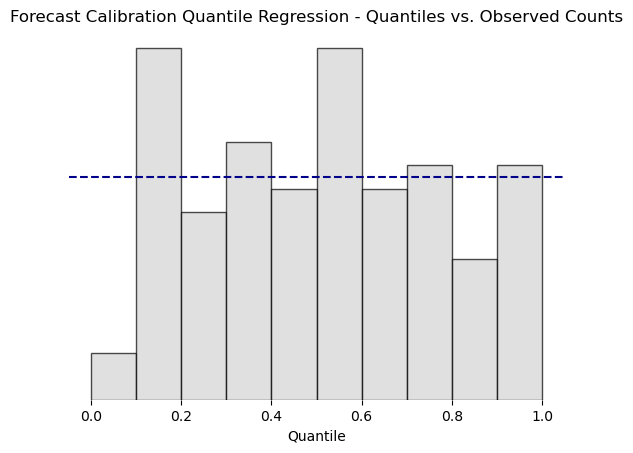

In [99]:
import matplotlib.pyplot as plt

bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)

# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')
plt.xlabel('Quantile')
plt.yticks([])

# Plot mean
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')


# Alternatively: observed counts in each quantile range
plt.title('Forecast Calibration Quantile Regression - Quantiles vs. Observed Counts')
plt.box(False)
plt.show()